In [206]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

In [207]:
data = pd.read_csv('multiple_linear_regression_dataset.csv')
data.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [208]:
x = data[['age','experience']]
y = data['income']
x.shape

(20, 2)

C:\Users\janma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\janma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\janma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


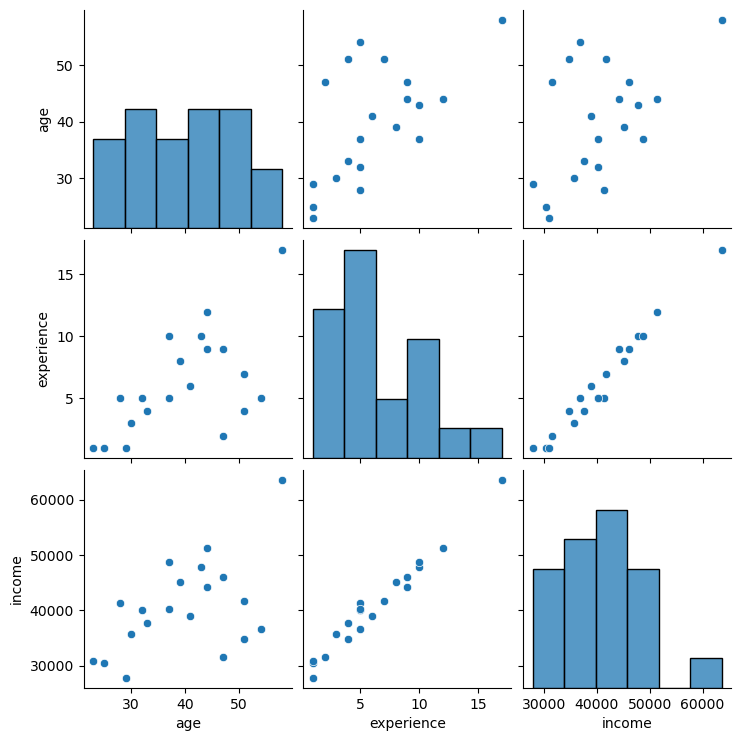

In [209]:
sns.pairplot(data,kind='scatter')

In [241]:
class LinearRegression():
    def __init__(self,ln=0.0011,epochs=50000):
        self.w = None
        self.b = 0
        self.ln = ln
        self.epochs = epochs

    def fit(self,x : [ [] ] , y : []):
        
        m,n = x.shape  # m - number of elements in list, n - number of features
        self.w = np.zeros(n)
        print(self.w)
        for i in range(self.epochs):
            dj_dw,dj_db = self.gradient_descent(x,y)
            self.w = self.w - self.ln * dj_dw
            self.b = self.b - self.ln * dj_db

            if (i % 100 == 0):
                print(f"Iteration : {i}, cost : {self.cost_function(x,y)}")
                

    def gradient_descent(self,x : [ [] ], y : []):
        m,n = x.shape  # m - number of elements in list, n - number of features
        
        dj_dw = np.zeros(n)
        dj_db = 0.
        
        for i in range(m):
            f_wb = np.dot(x[i],self.w) + self.b
            error = f_wb - y[i]
            for j in range(n):
                dj_dw[j] = dj_dw[j] + error * x[i,j]
            dj_db += error

        dj_dw /= m
        dj_db /= m
        return dj_dw,dj_db
    
    def cost_function(self,x : [ [] ], y : [] ):
        m,n = x.shape
        cost = 0.0
        for i in range(m):
            f_wb = (np.dot(x[i],self.w) + self.b) 
            cost = cost + (f_wb - y[i]) **2
        return cost / (2*m)

    def predict(self,x):
        return np.dot(x, self.w) + self.b

    def coef_(self):
        return self.w

    def intercept_(self):
        return self.b


In [242]:
reg_my_linear_regression = LinearRegression()

In [243]:
reg_my_linear_regression.fit(np.array(x),np.array(y))

[0. 0.]
Iteration : 0, cost : 682388934.2944264
Iteration : 100, cost : 27265656.31111737
Iteration : 200, cost : 26107448.438526865
Iteration : 300, cost : 25733407.86250051
Iteration : 400, cost : 25437311.974435717
Iteration : 500, cost : 25151668.070030686
Iteration : 600, cost : 24869994.600043572
Iteration : 700, cost : 24591638.13203593
Iteration : 800, cost : 24316502.32498846
Iteration : 900, cost : 24044544.442402653
Iteration : 1000, cost : 23775727.25528318
Iteration : 1100, cost : 23510014.44349345
Iteration : 1200, cost : 23247370.15207787
Iteration : 1300, cost : 22987758.94451283
Iteration : 1400, cost : 22731145.79392213
Iteration : 1500, cost : 22477496.07796885
Iteration : 1600, cost : 22226775.57414749
Iteration : 1700, cost : 21978950.45516324
Iteration : 1800, cost : 21733987.284367613
Iteration : 1900, cost : 21491853.011247143
Iteration : 2000, cost : 21252514.966964148
Iteration : 2100, cost : 21015940.859949134
Iteration : 2200, cost : 20782098.771543954
Itera

In [244]:
print(reg_my_linear_regression.coef_())
print(reg_my_linear_regression.intercept_())

[ -52.81073154 2127.63471675]
29547.613918102692


In [245]:
y_pred_my_class = reg_my_linear_regression.predict(x)

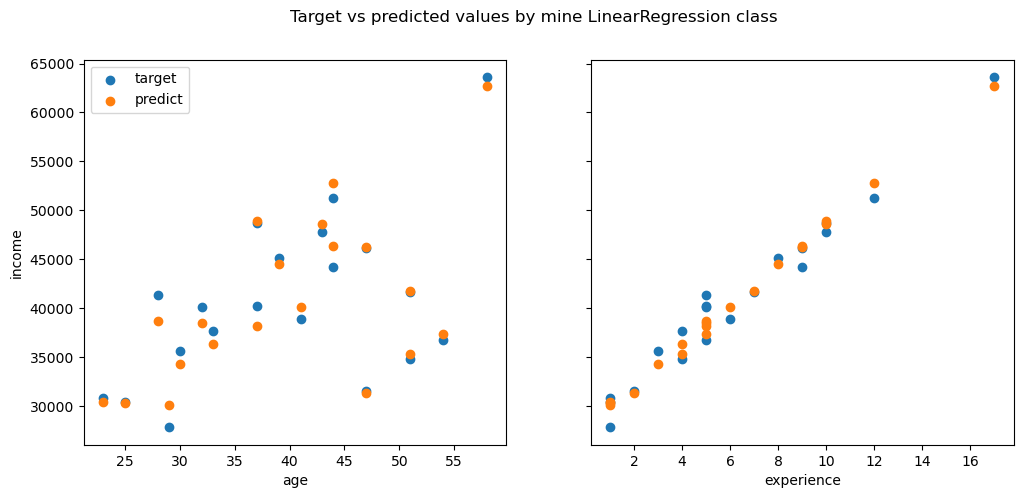

In [246]:
fig, ax = plt.subplots(1,2,figsize=(12,5),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x.iloc[:,i],y, label = 'target')
    ax[i].set_xlabel(np.array(x.columns)[i])
    ax[i].scatter(x.iloc[:,i],y_pred_my_class, label = 'predict')
ax[0].set_ylabel("income"); ax[0].legend();
fig.suptitle("Target vs predicted values by mine LinearRegression class")
plt.show()

In [227]:
from sklearn.linear_model import LinearRegression

In [228]:
reg_sklearn = LinearRegression()

In [229]:
reg_sklearn.fit(x,y)
print(reg.coef_)
print(reg.intercept_)

[ -99.19535546 2162.40419192]
31261.689854101285


In [230]:
y_pred = reg.predict(x)

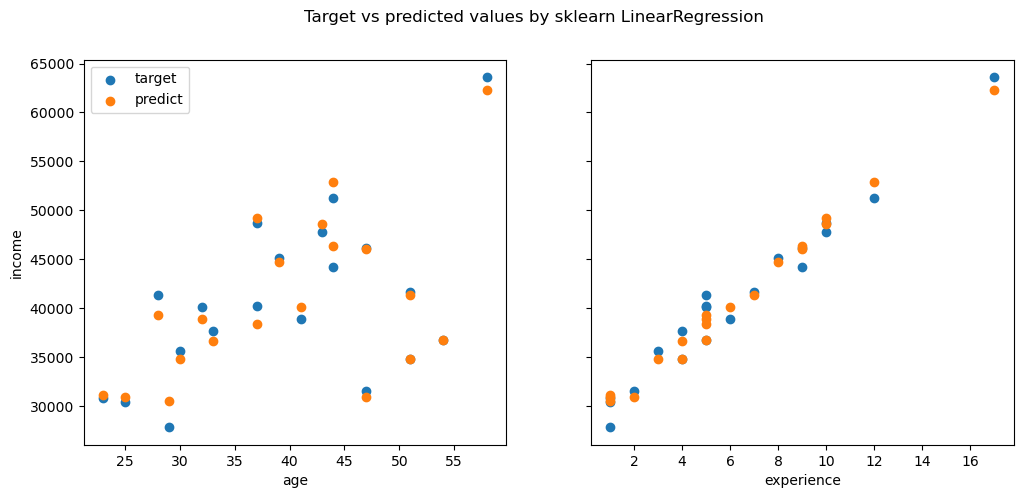

In [231]:
fig, ax = plt.subplots(1,2,figsize=(12,5),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x.iloc[:,i],y, label = 'target')
    ax[i].set_xlabel(np.array(x.columns)[i])
    ax[i].scatter(x.iloc[:,i],y_pred, label = 'predict')
ax[0].set_ylabel("income"); ax[0].legend();
fig.suptitle("Target vs predicted values by sklearn LinearRegression")
plt.show()